## IMPORTING LIBRARIES AND LOADING DATA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

## Data Exploration

In [2]:
data = pd.read_csv("HR_Employee_Attrition.csv", encoding_errors = "ignore")

In [3]:
print("The Shape of the data is :", data.shape)
print("The number of the rows in the data is :", data.shape[0])
print("The number of the columns in the data is :", data.shape[1])

The Shape of the data is : (1470, 35)
The number of the rows in the data is : 1470
The number of the columns in the data is : 35


In [4]:
df = pd.DataFrame(data)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* There are 34 total features in which 9 features are object and remaining are in forms of numbers.

In [6]:
# Differentiate the "Object" and "int64" datatype features

df1 = df.select_dtypes("object")
df1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [7]:
df2 = df.select_dtypes("int64")
df2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


### Let's look at the statistics of the dataset

In [8]:
df1.describe().T.style.background_gradient(cmap = 'coolwarm')

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [9]:
df.describe(include='int64').T.style.background_gradient(cmap = "cividis")

,count,mean,std,min,25%,50%,75%,max
Age,1470.000000,36.923810,9.135373,18.000000,30.000000,36.000000,43.000000,60.000000
DailyRate,1470.000000,802.485714,403.509100,102.000000,465.000000,802.000000,1157.000000,1499.000000
DistanceFromHome,1470.000000,9.192517,8.106864,1.000000,2.000000,7.000000,14.000000,29.000000
Education,1470.000000,2.912925,1.024165,1.000000,2.000000,3.000000,4.000000,5.000000
EmployeeCount,1470.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeNumber,1470.000000,1024.865306,602.024335,1.000000,491.250000,1020.500000,1555.750000,2068.000000
EnvironmentSatisfaction,1470.000000,2.721769,1.093082,1.000000,2.000000,3.000000,4.000000,4.000000
HourlyRate,1470.000000,65.891156,20.329428,30.000000,48.000000,66.000000,83.750000,100.000000
JobInvolvement,1470.000000,2.729932,0.711561,1.000000,2.000000,3.000000,3.000000,4.000000
JobLevel,1470.000000,2.063946,1.106940,1.000000,1.000000,2.000000,3.000000,5.000000


## EXPLORATORY DATA ANALYSIS

### Let's look at the missing values in the dataset.

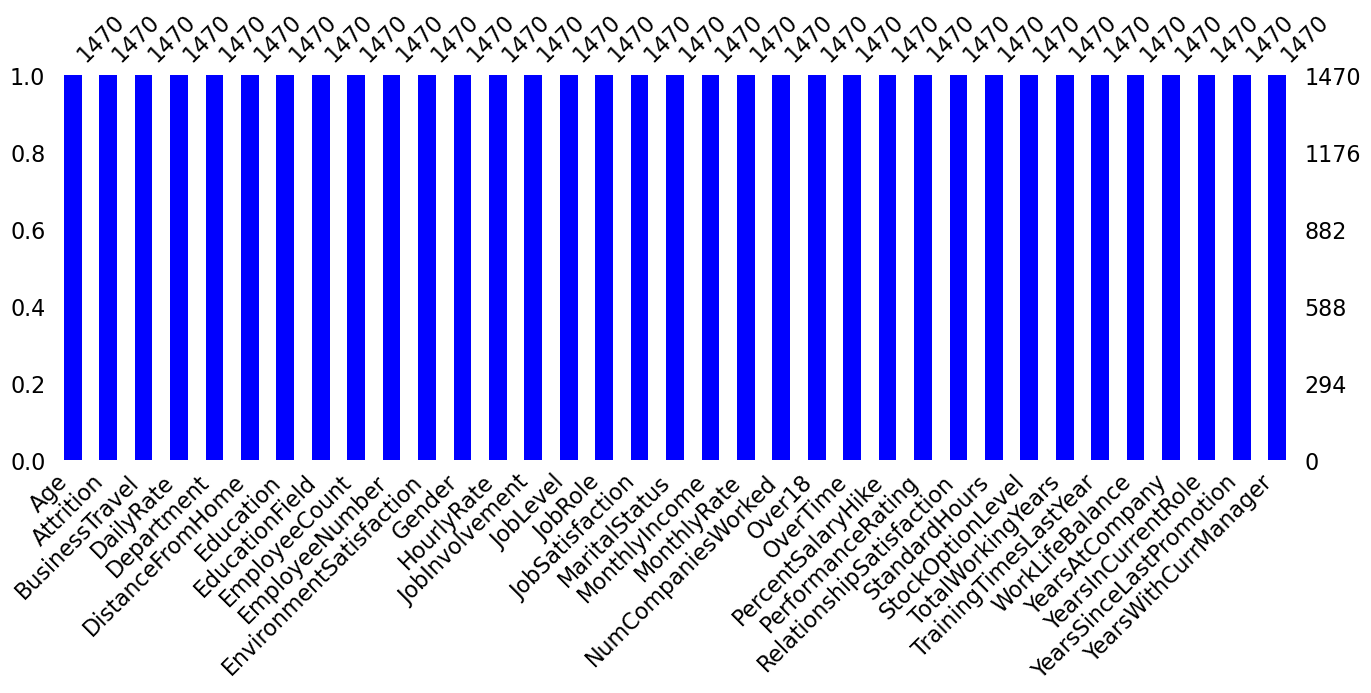

In [10]:
msno.bar(df, figsize = (16,5),color = "Blue")
plt.show()

### Let's check our dataset for duplicates

In [11]:
df.duplicated().sum()

0

* There is no missing value and duplicate rows in dataset.
* There are 4 columns in dataset which values do not affect the analysis

In [12]:
# Remove 4 columns

df = df.drop(["Over18", "EmployeeNumber", "EmployeeCount", "StandardHours"], axis= 1)

In [13]:
# Separate categorical and numerical columns  
categorical = [var for var in df.columns if df[var].dtypes=='O']
numerical = [var for var in df.columns if df[var].dtypes!='O']

In [14]:
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [15]:
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

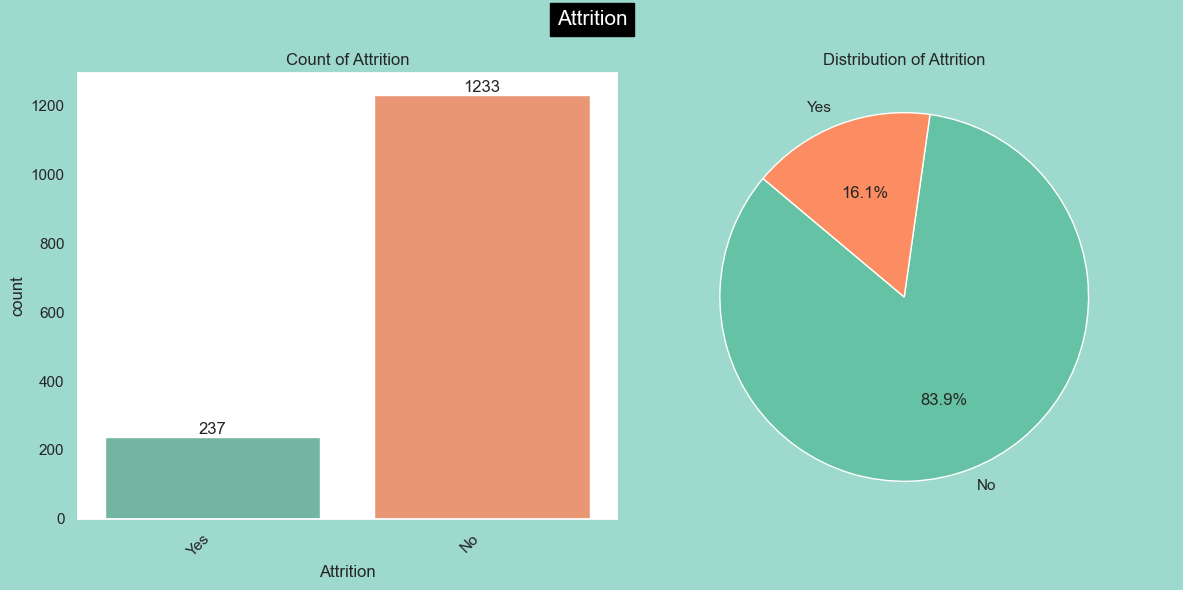

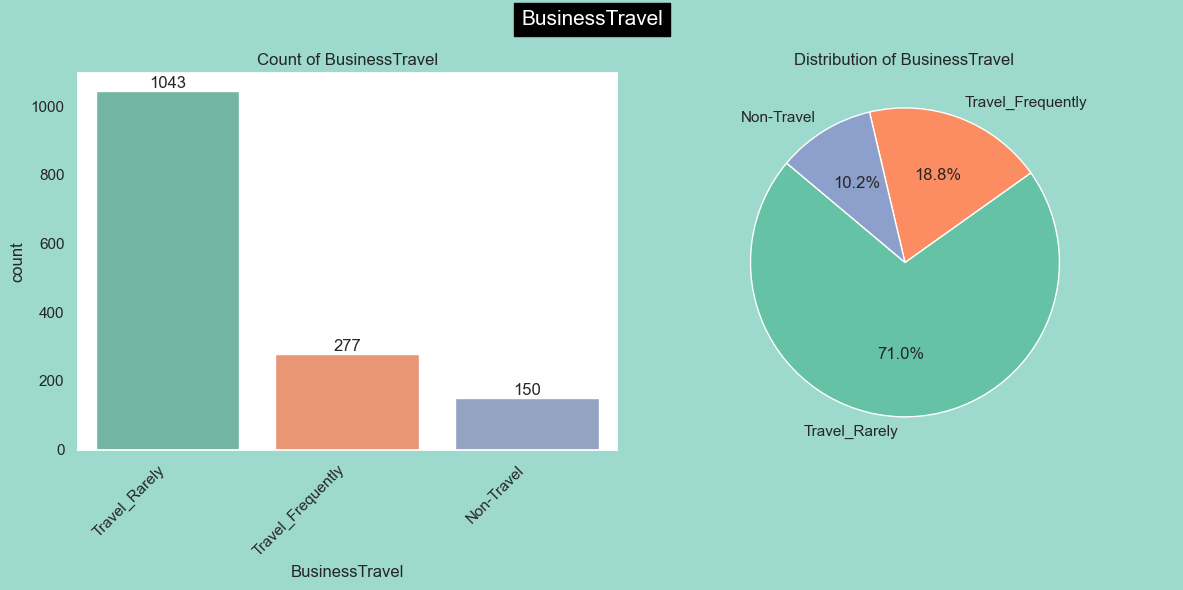

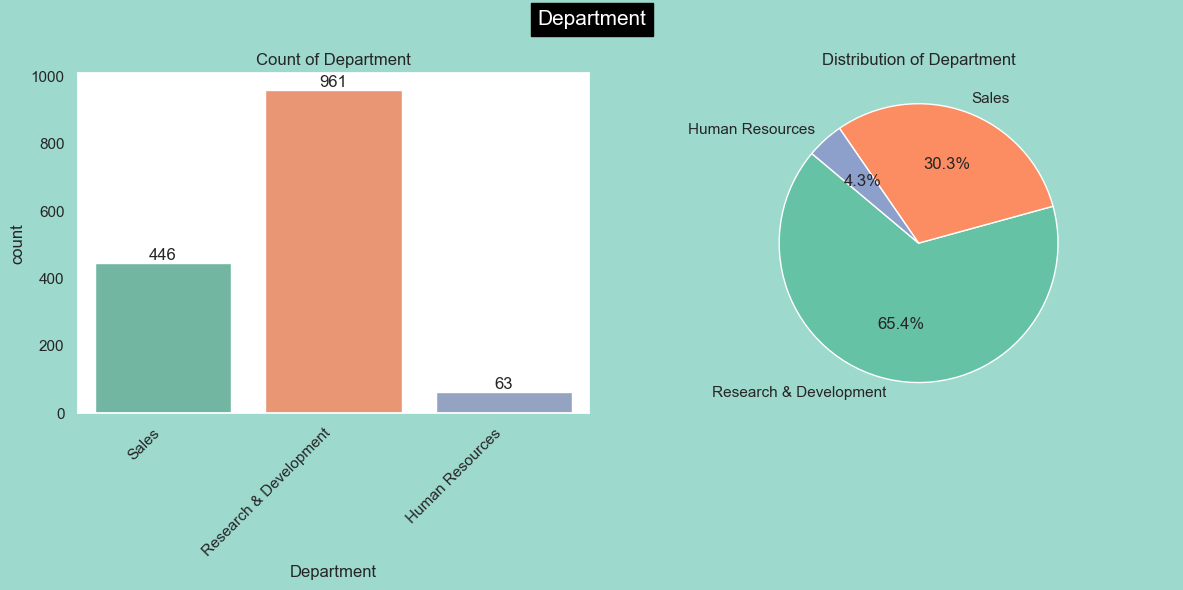

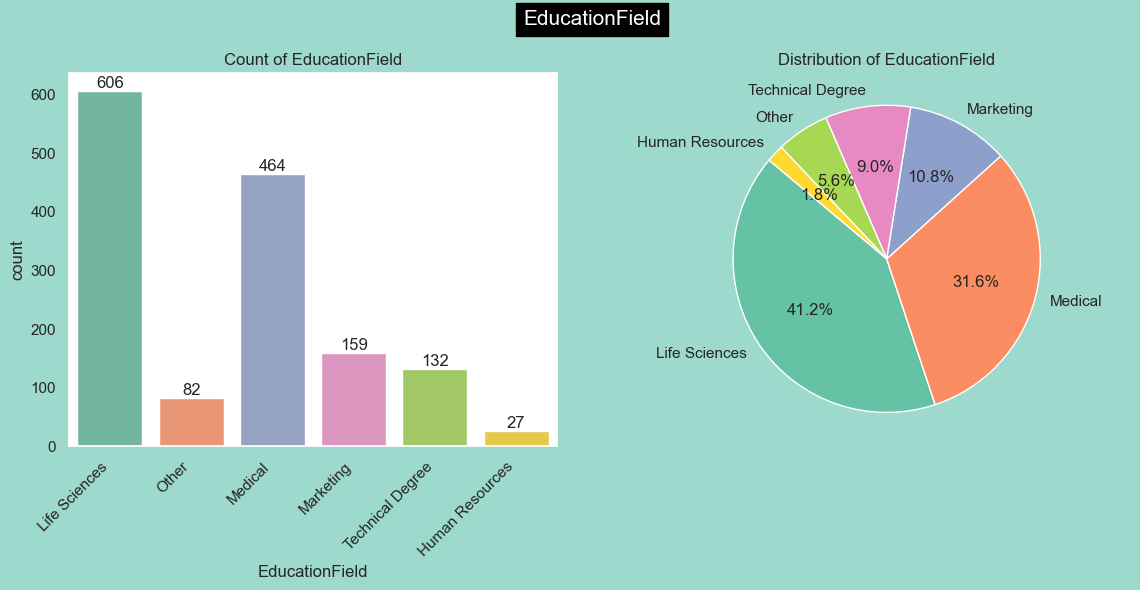

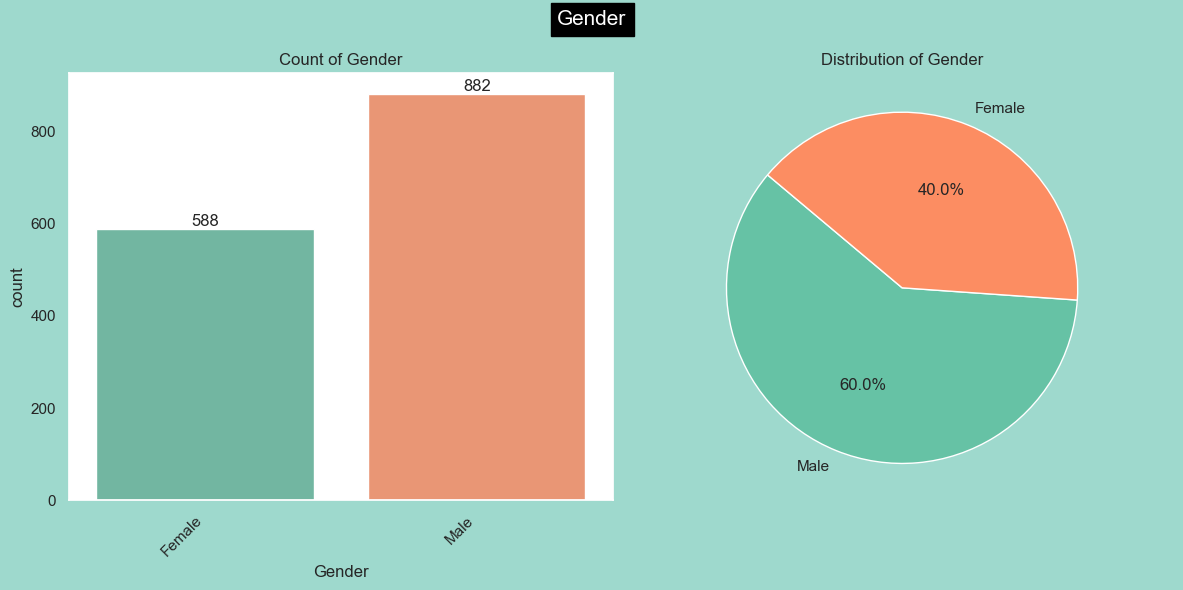

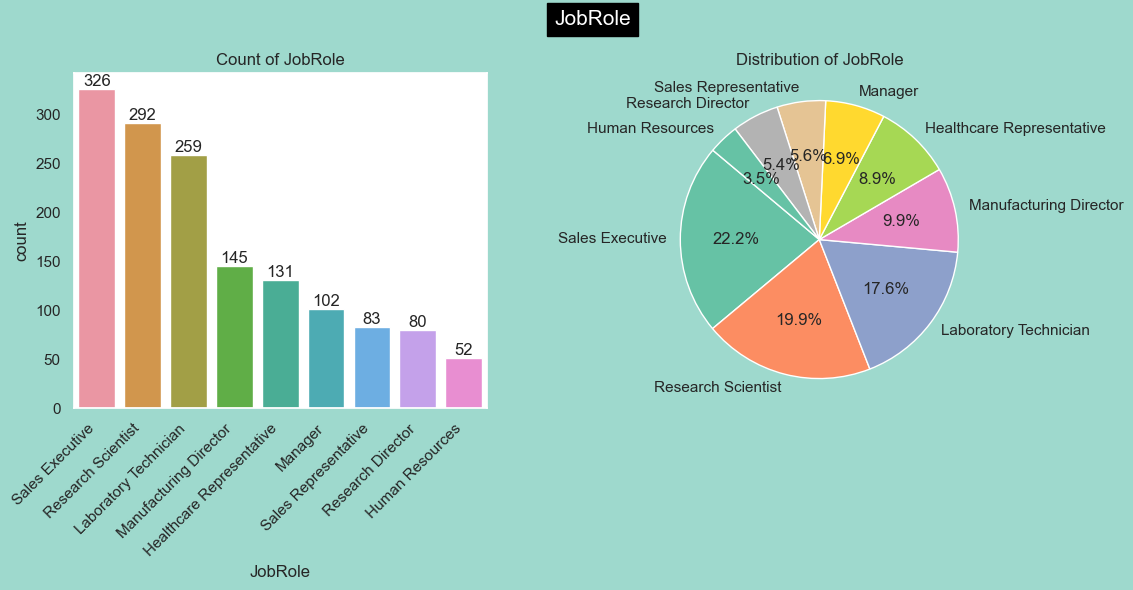

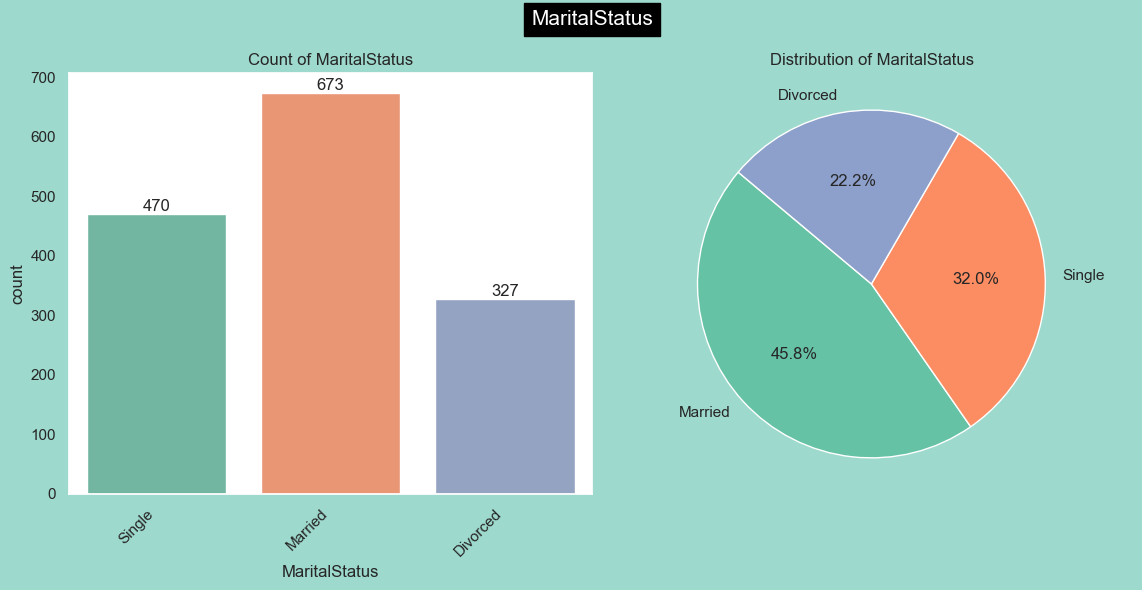

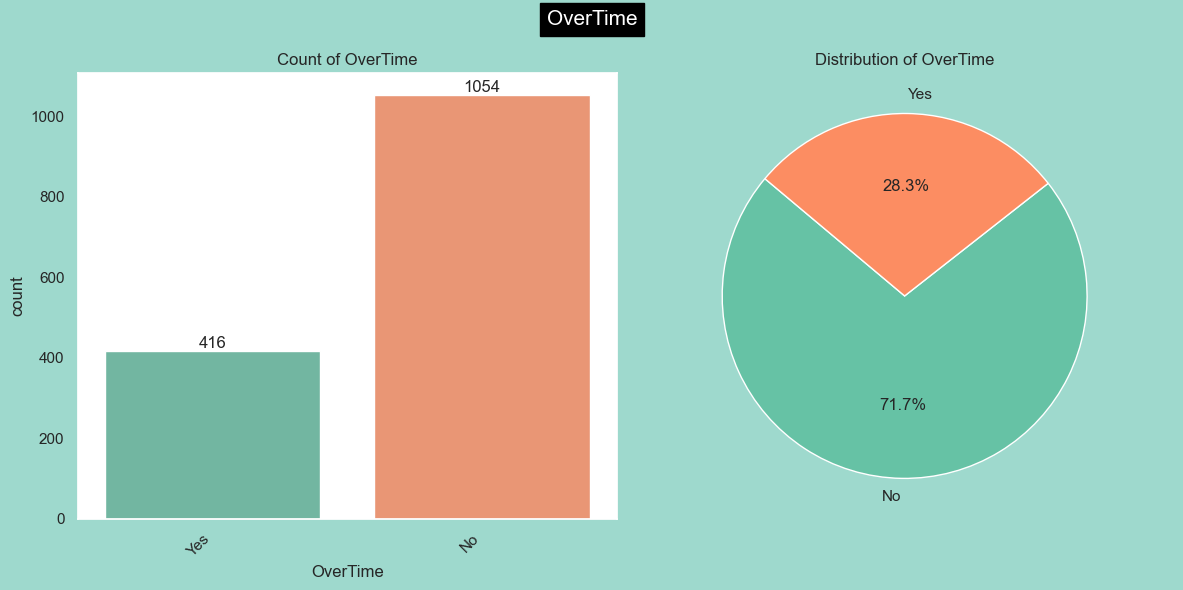

In [16]:
## Univariate analysis of Categorical Data

sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "#9ed9cd"})
sns.set_palette("Set2")

for col in categorical:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Count plot
    sns.countplot(data=df, x=col, ax=axes[0])
    axes[0].set_title(f'Count of {col}')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
    for container in axes[0].containers:
        axes[0].bar_label(container)

    # Pie chart
    sizes = df[col].value_counts()
    axes[1].pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
    axes[1].axis('equal')
    axes[1].set_title(f'Distribution of {col}')

    plt.suptitle(col, backgroundcolor='black', color='white', fontsize=15)
    plt.tight_layout()

    plt.show()

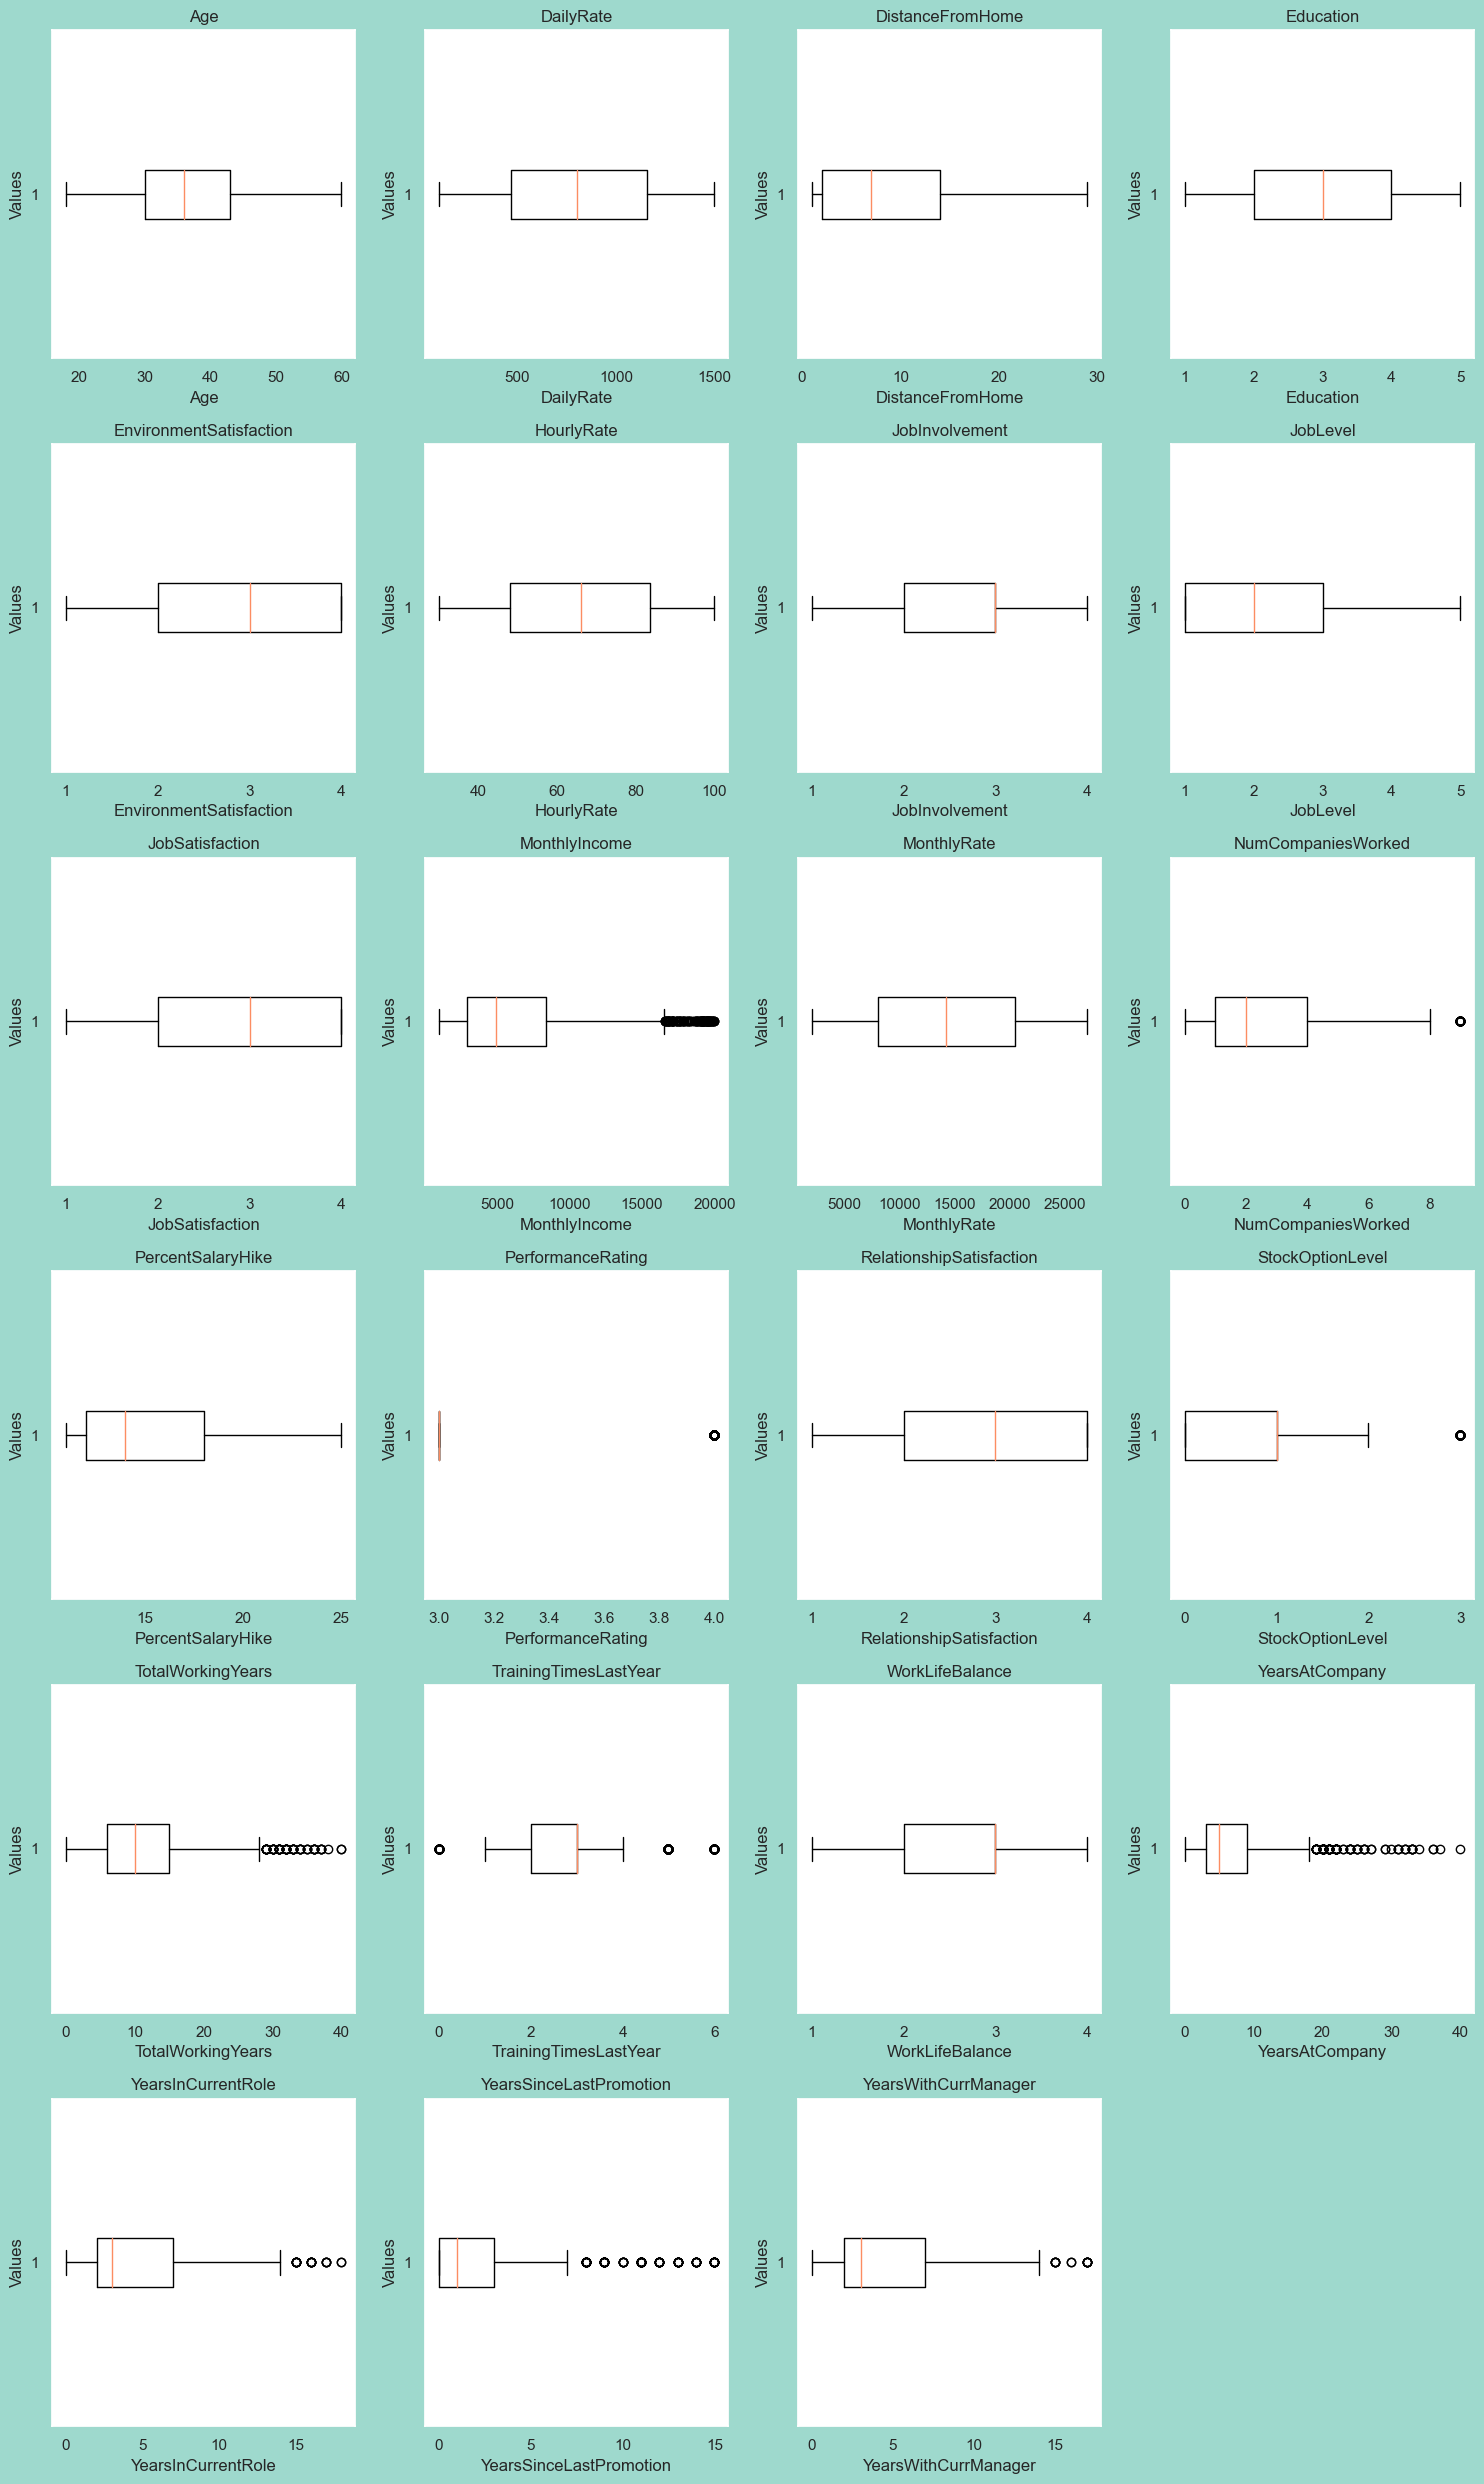

In [17]:
plt.figure(figsize=(15, 25))

num_numerical = len(numerical)
cols = 4
rows = (num_numerical // cols) + 1 
for i, col in enumerate(numerical):
    plt.subplot(rows, cols, i + 1)
    plt.boxplot(df[col], vert = False)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()


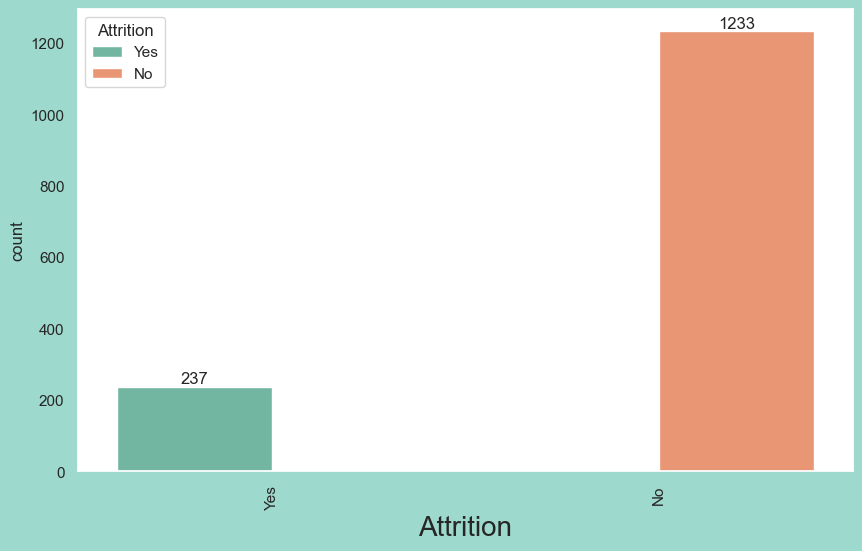

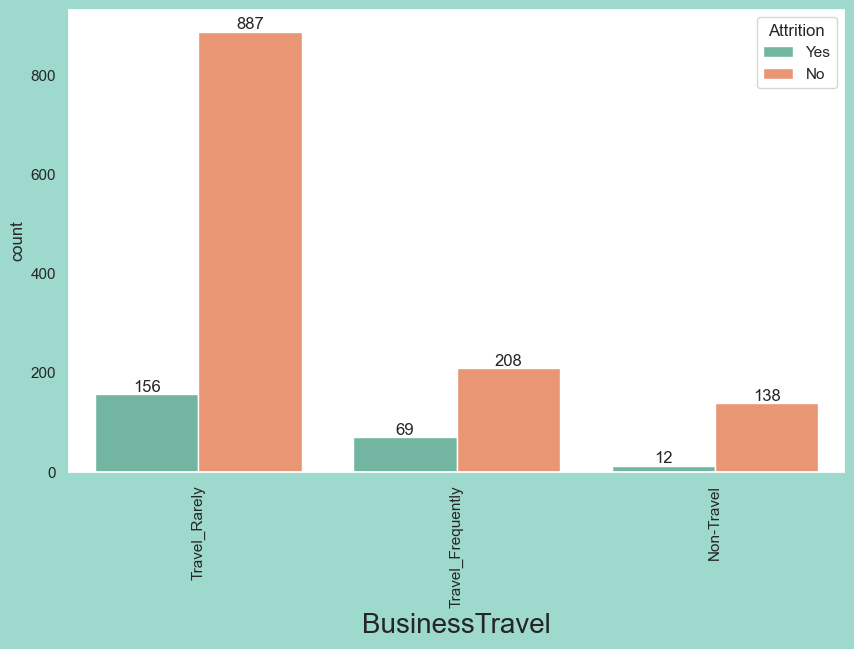

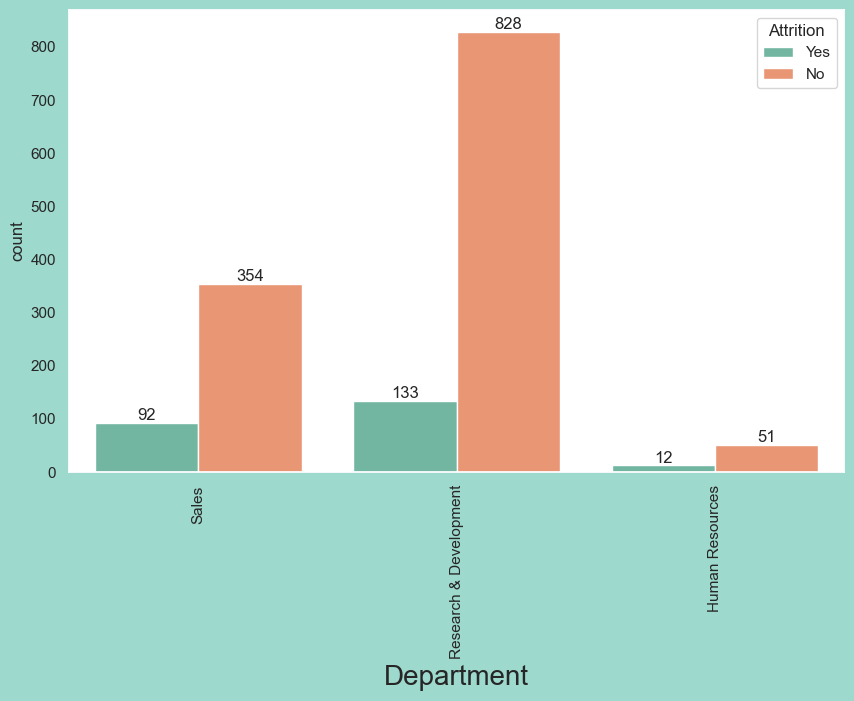

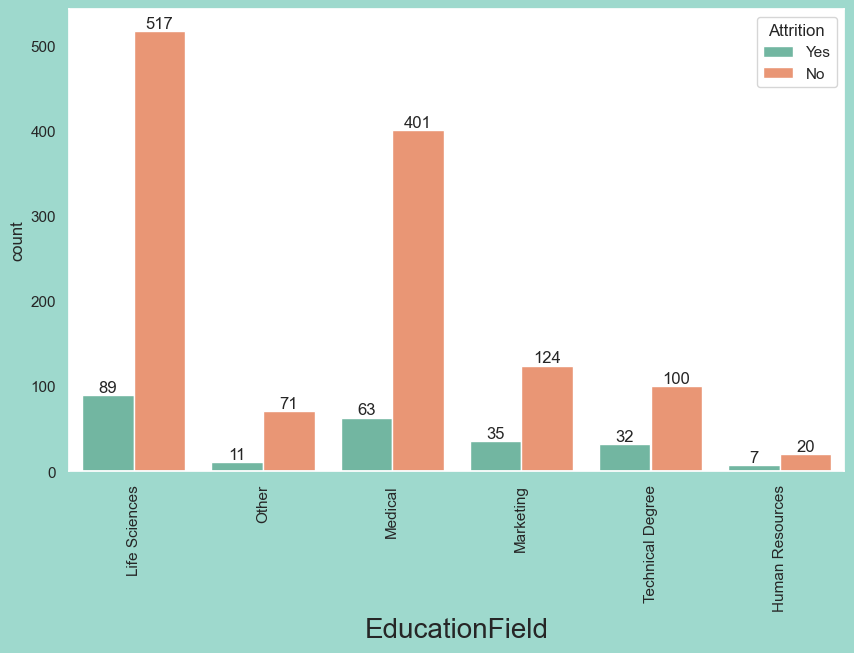

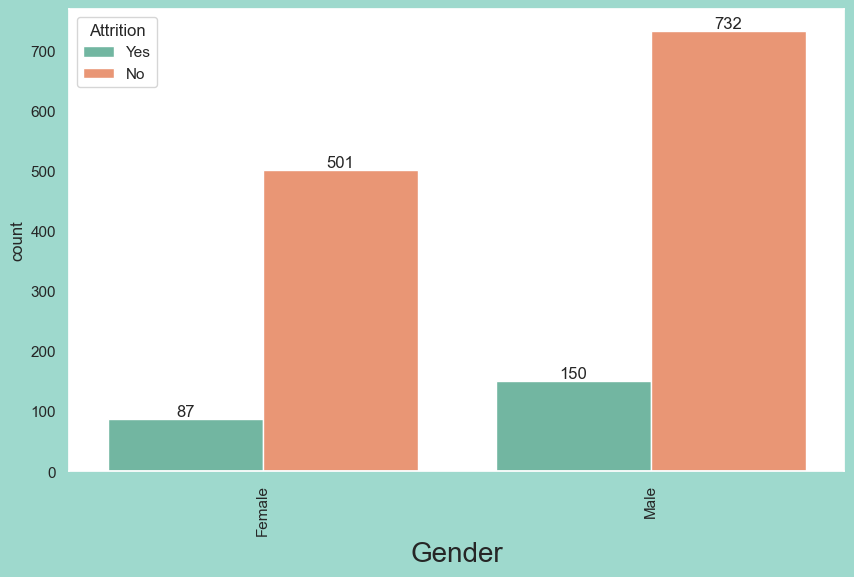

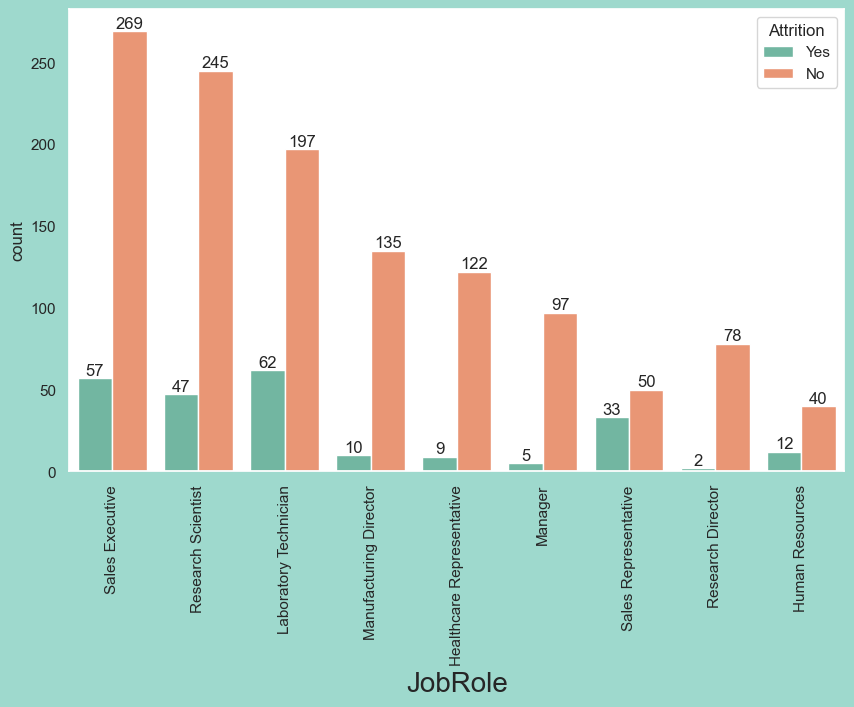

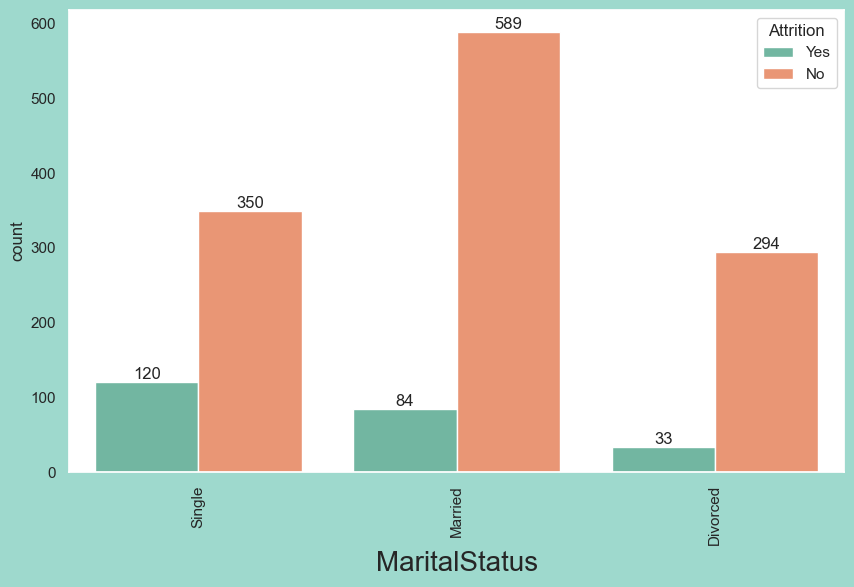

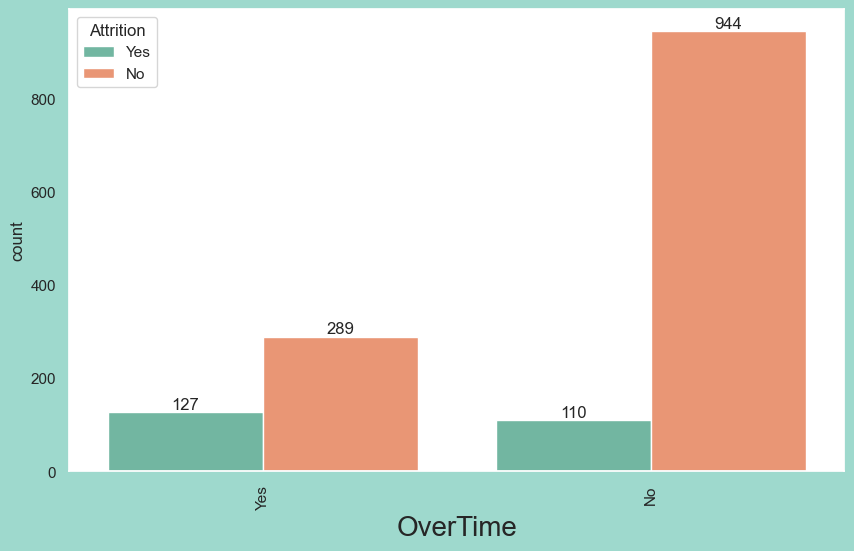

In [18]:
for col in categorical:
    plt.figure(figsize=(10, 6))

    # Count plot
    ax= sns.countplot(x=df[col], data=df, hue='Attrition')
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=90)
    plt.xlabel(col,fontsize=20)
    plt.grid()
    plt.show()    

## Relation between Overtime and Age

<Figure size 500x1000 with 0 Axes>

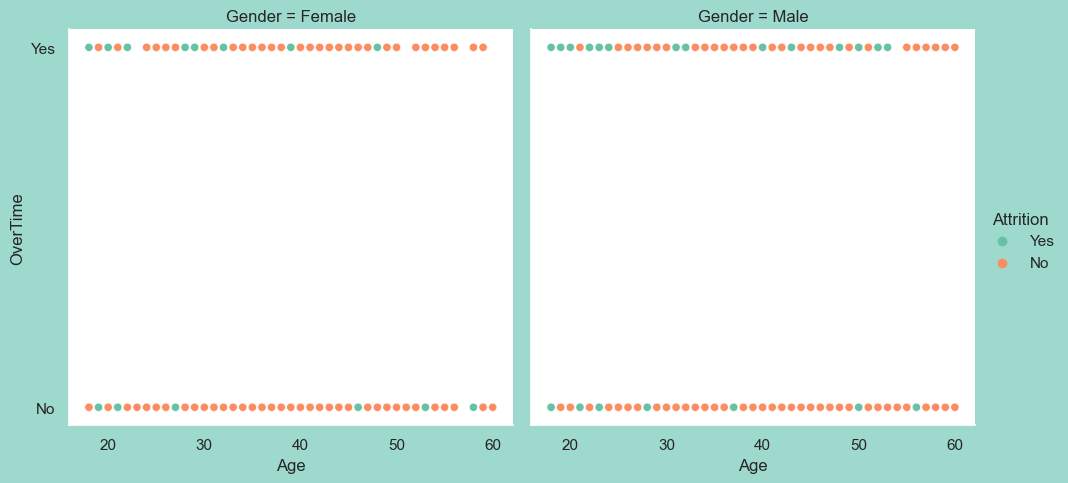

In [25]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="OverTime", x="Age", hue="Attrition",col='Gender')
plt.show()

## Total Working Years

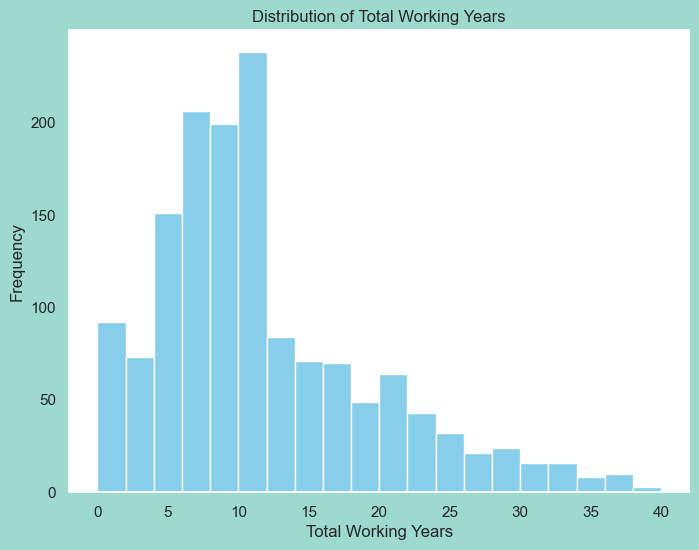

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(df['TotalWorkingYears'], bins=20, color='skyblue')
plt.title('Distribution of Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Education Level

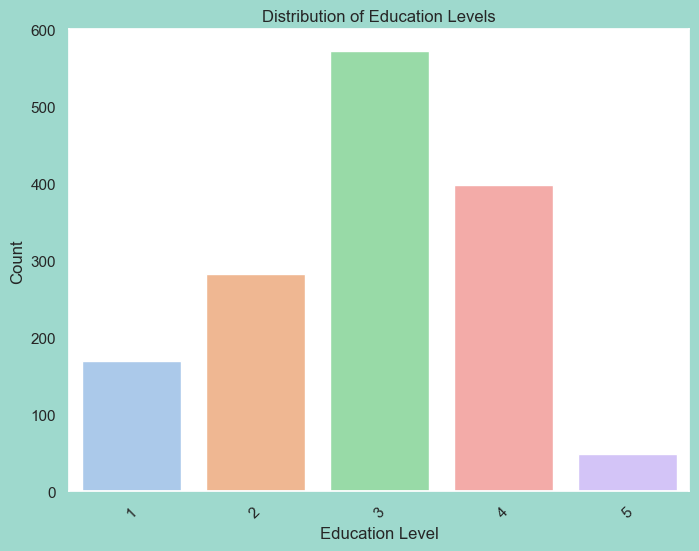

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df, palette='pastel')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y')
plt.show()

## Number of Companies Worked

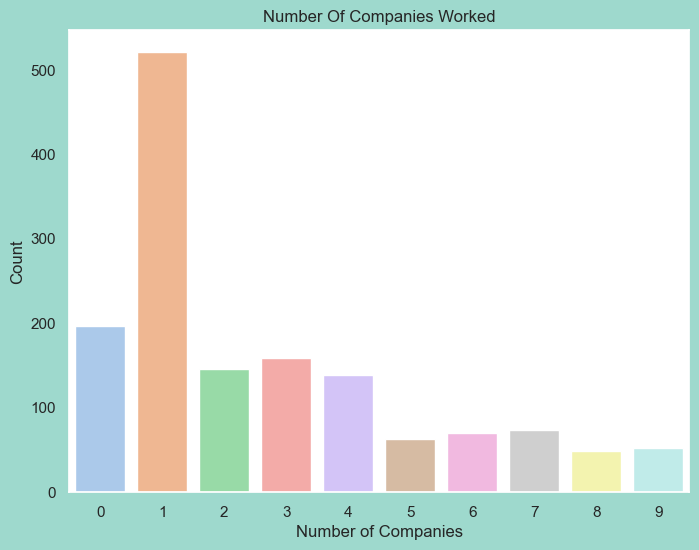

In [32]:
plt.figure(figsize = (8, 6))
sns.countplot(x='NumCompaniesWorked', data=df, palette = 'pastel')
plt.title("Number Of Companies Worked")
plt.xlabel("Number of Companies")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

## Distance from Home

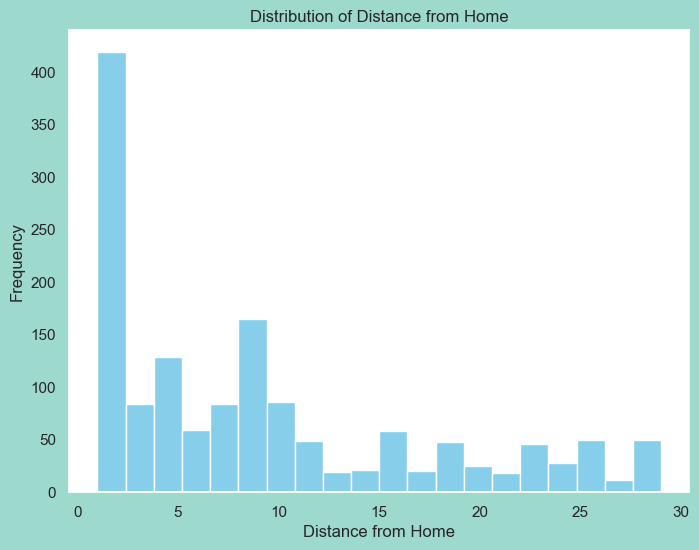

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(df['DistanceFromHome'], bins=20, color='skyblue')
plt.title('Distribution of Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### We need to convert categorical attribute with binary variable into numeric

In [35]:
df_copy = df.copy()

In [36]:
# By using LabelEncoder we can convert these three binary attributes into numeric

from sklearn.preprocessing import LabelEncoder

In [38]:
label_encoder = LabelEncoder()
df_copy['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df_copy['OverTime'] = label_encoder.fit_transform(df['OverTime'])
df_copy['Gender'] = label_encoder.fit_transform(df['Gender'])

In [40]:
 # By using One-Hot encoding we need to convert these binary attributes into numeric
    
# Perform one-hot encoding
df_copy = pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField', 
                                             'JobRole', 'MaritalStatus'])    

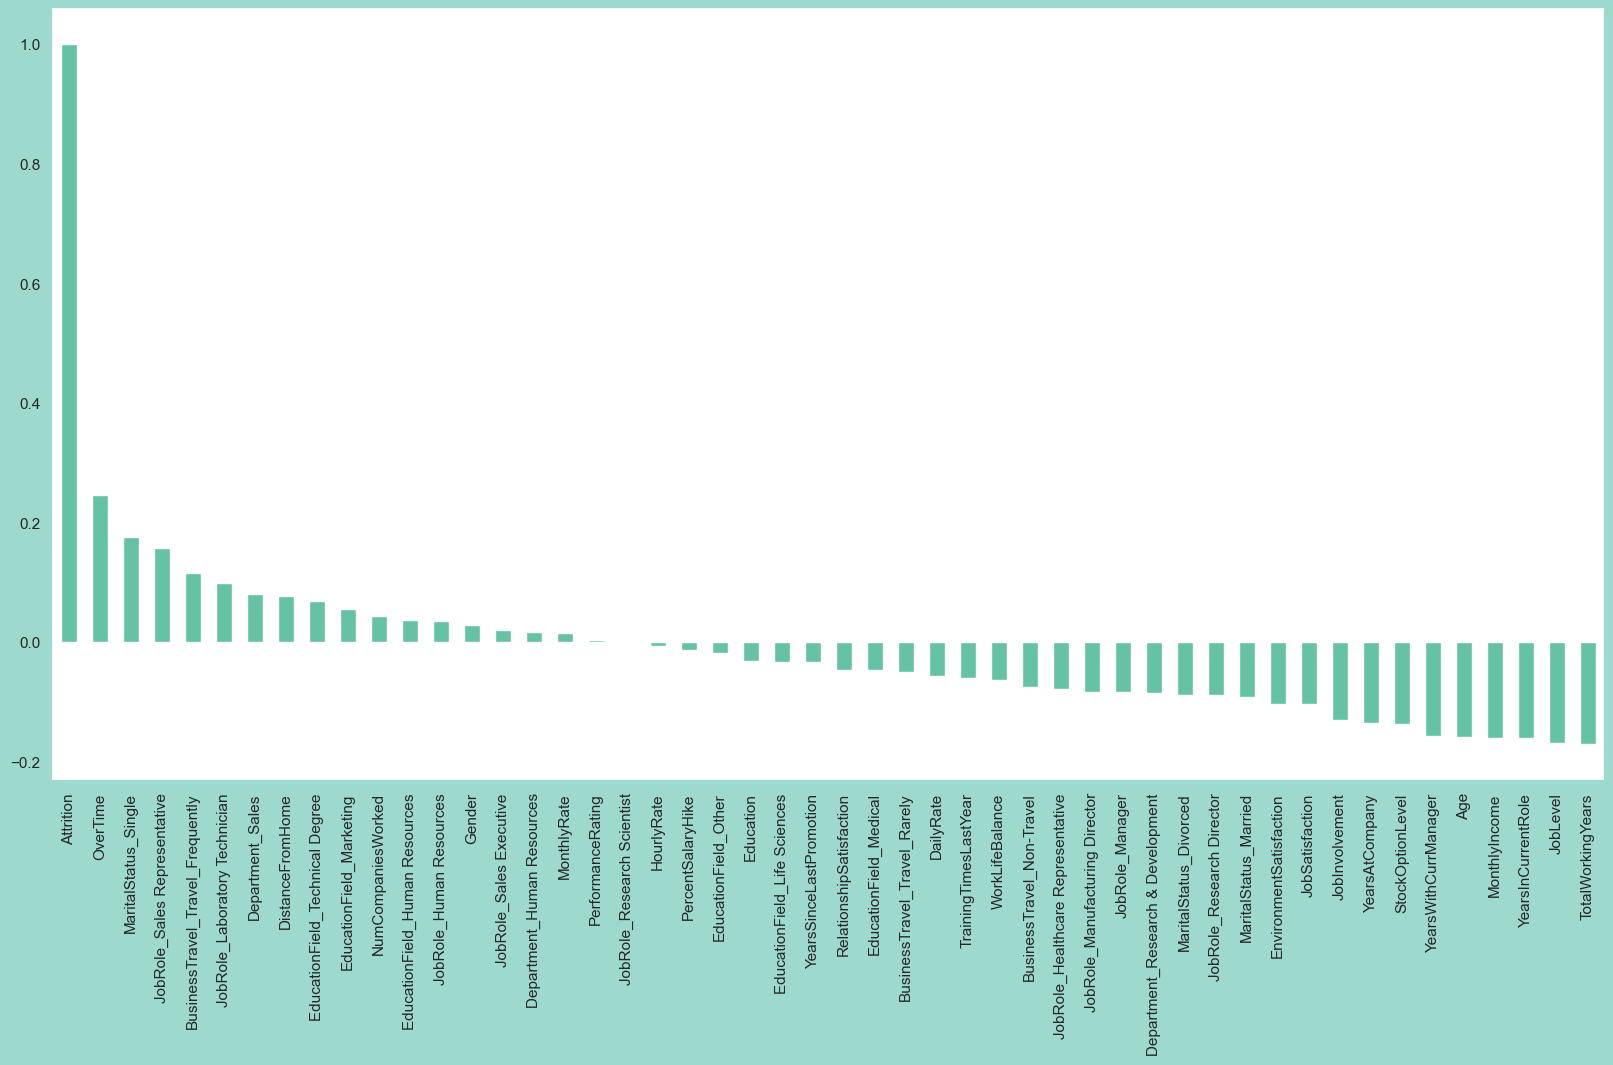

In [47]:
plt.figure(figsize=(20,10))
correlations=df_copy.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [48]:
df2_copy = df2.copy()
df2_copy = df2_copy.drop(['EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

## Correlation map for all numeric variables

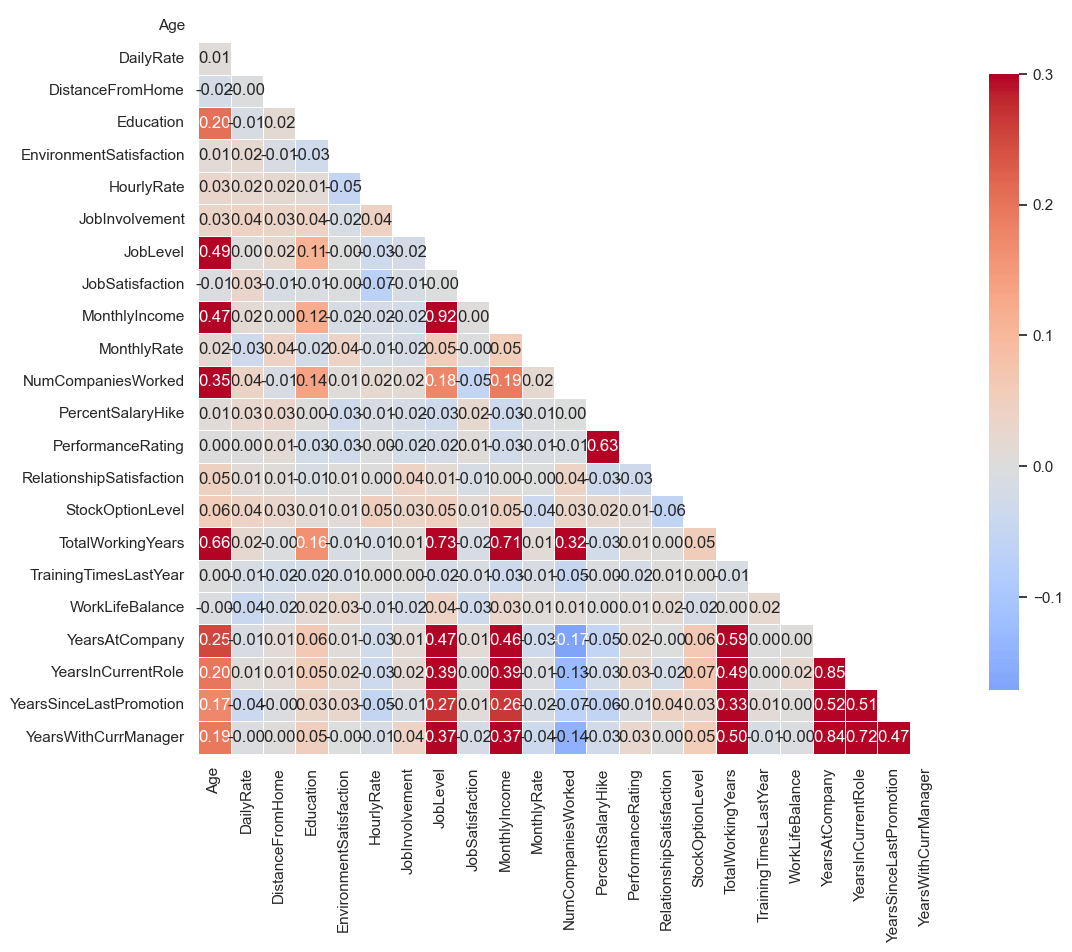

In [67]:
corr = df2_copy.corr()
sns.set(style="white")


corr = df2_copy.corr(method = "spearman")
sns.set(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap= "coolwarm", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

* There are high correlation between some features:
  * Monthly Income and Job Level
  * YearsInCurrentRole, YearsAtCompany, YearsWithCurrManager 